**NOTE**:
* Performance MultiSURF vs. ReliefF?
* Change in model performance between experiments (sum where diff mat > 0).
* How to compare results from all heat maps?

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import gridspec

from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.axes_grid1.colorbar import colorbar

sns.set()
%matplotlib inline

In [2]:
def format_estimator_labels(labels):
    
    mapper = {
        'QuadraticDiscriminantEstimator': 'QDA',
        'ExtraTreesEstimator': 'Extra Trees',
        'KNNEstimator': 'KNN',
        'LightGBM': 'LightGBM',
        'LogRegEstimator': 'Logistic Regression',
        'RFEstimator': 'Random Forest',
        'SVCEstimator': 'SVC',
        'DTreeEstimator': 'Decision Tree', 
        'XGBoost': 'XGBoost',
        'RidgeClassifier': 'Ridge Classifier'
    }
    new_labels = []
    for label in labels:
        new_labels.append(mapper[label])
        
    return new_labels

In [3]:
def format_selector_labels(labels):
    
    mapper = {
        'ChiSquareSelection': 'Chi Square',
        'DummySelection': 'No Feature\nSelection',
        'WilcoxonSelection': 'Wilcoxon',
        'FisherScoreSelection': 'Fisher Score',
        'MultiSURFSelection': 'MultiSURF',
        'MutualInformationSelection': 'Mutual\nInformation',
        'ReliefFSelection': 'ReliefF'
    }
    new_labels = []
    for label in labels:
        new_labels.append(mapper[label])
        
    return new_labels

In [4]:
def gen_heatmap_mat(results, kind='test_score'):
    
    _selector_lbls, _estimator_lbls = [], []
    for label in np.unique(results['experiment_id']):

        selector_lbl, estimator_lbl = label.split('_')

        _selector_lbls.append(selector_lbl)
        _estimator_lbls.append(estimator_lbl)

    selector_lbls = np.unique(_selector_lbls)
    estimator_lbls = np.unique(_estimator_lbls)
    
    
    results_mat = np.zeros((len(estimator_lbls), len(selector_lbls)))
    for row_num, estimator_lbl in enumerate(estimator_lbls):
        for col_num, selector_lbl in enumerate(selector_lbls):

            label = f'{selector_lbl}_{estimator_lbl}'
            location = np.where(label == np.array(results['experiment_id']))
            scores = results.iloc[np.squeeze(location), :][kind]

            results_mat[row_num, col_num] = np.mean(scores)
    
    return results_mat, selector_lbls, estimator_lbls

In [5]:
def gen_heatmap(results, kind='test_score', path_to_fig=None):
    
    results_mat, selector_lbls, estimator_lbls = gen_heatmap_mat(results, kind=kind)
    
    fig = plt.figure(figsize=(14, 14))
    hmap = sns.heatmap(
        results_mat.T * 100,
        yticklabels=format_selector_labels(selector_lbls),
        xticklabels=format_estimator_labels(estimator_lbls),
        vmin=np.nanmin(results_mat) * 100 - 3, 
        vmax=np.nanmax(results_mat) * 100 + 3,
        cmap=plt.cm.viridis, 
        robust=True,
        annot=True, 
        fmt='.2f', 
        square=1, 
        linewidth=.5,
        cbar=False,
    )
    plt.xlabel('Classification Algorithm', fontsize=20)
    plt.ylabel('Feature Selection Algorithm', fontsize=20, va='bottom', ha='center')
    hmap.set_yticklabels(hmap.get_yticklabels(), rotation=0, fontsize=16)
    hmap.set_xticklabels(
        hmap.get_xticklabels(), rotation=45, fontsize=16, 
        va='top', ha='right'
    )
    ax_divider = make_axes_locatable(hmap)
    # Define size and padding of axes for colorbar.
    cax = ax_divider.append_axes('top', size='5%', pad='3%')
    colorbar(hmap.get_children()[0], cax=cax, orientation='horizontal')
    cax.xaxis.set_ticks_position('top')

    plt.tight_layout()
    
    if path_to_fig is not None:
        plt.savefig(
            path_to_fig,
            bbox_inches='tight',
            transparent=True,
            dpi=100, 
        )

# Baseline

In [6]:
# NIR: 0.67676767
results_orig = pd.read_csv(
    './../../data_source/results/original_images/results_all_features_original_images.csv',
    index_col=0
)

/anaconda3/envs/biorad/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


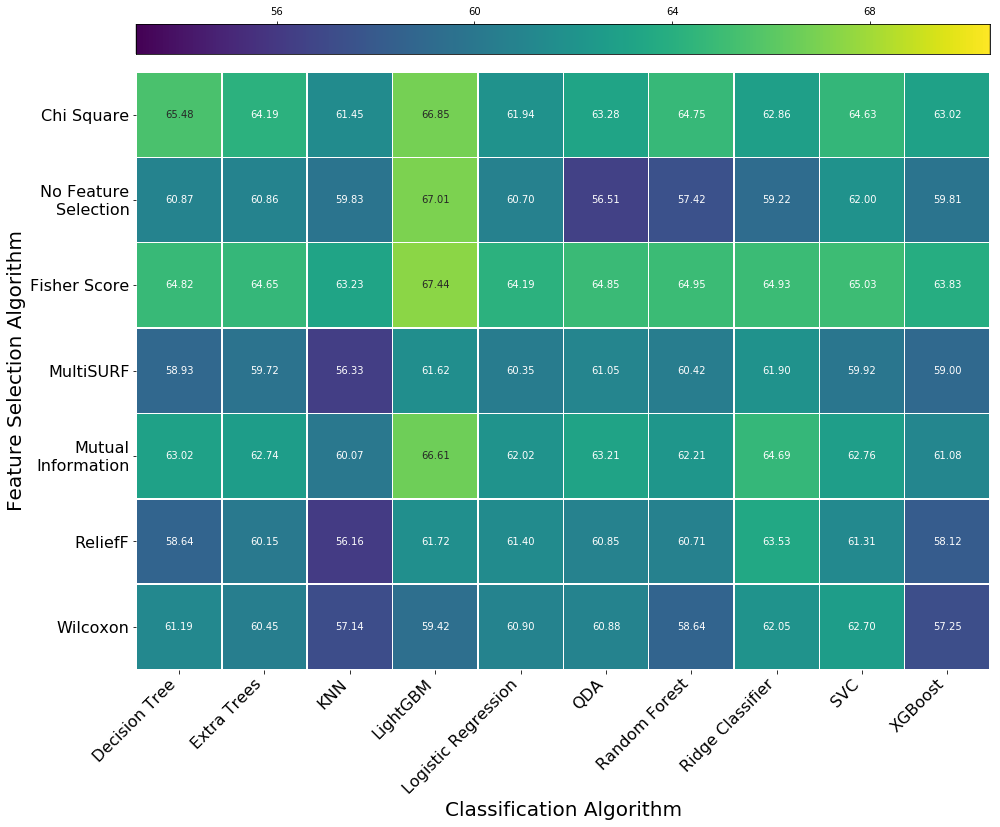

In [7]:
gen_heatmap(
    results_orig,
    path_to_fig='./../../figures/model_comparison_results/hmap_original_images.png'
)

# Reduced Image Set

In [8]:
# NIR: 0.6844919786096
results_rs = pd.read_csv(
    './../../data_source/results/removed_broken_slices/results_all_features_removed_broken_slices.csv',
    index_col=0
)

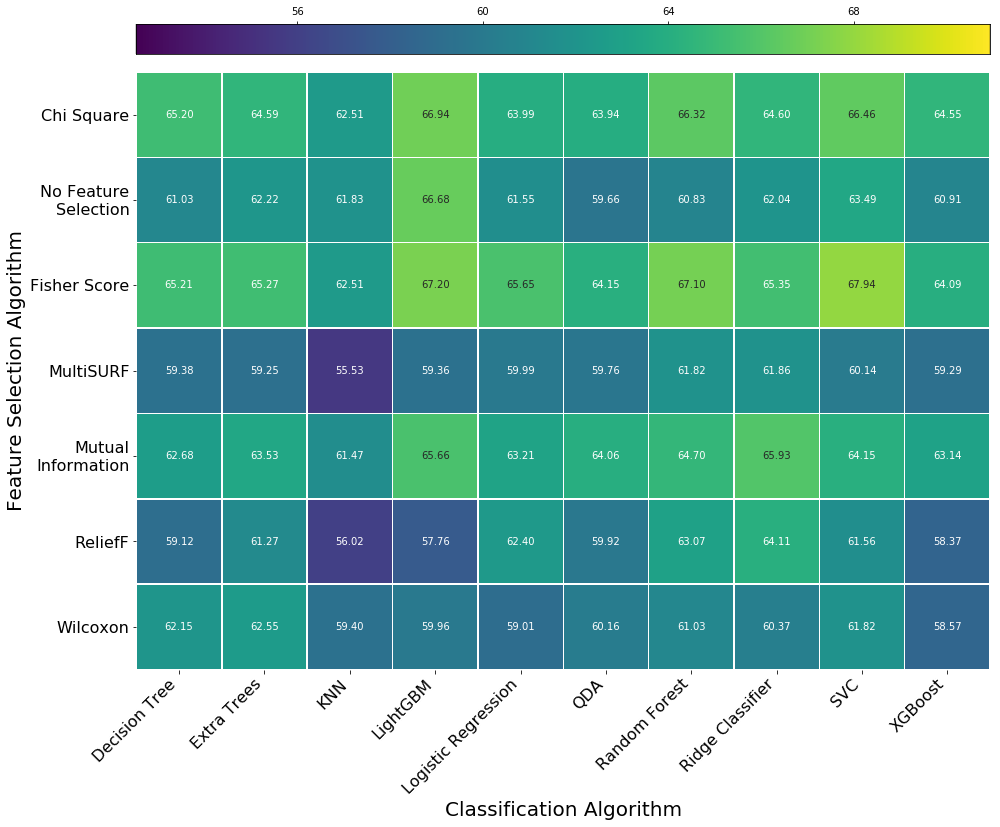

In [9]:
gen_heatmap(
    results_rs,
    path_to_fig='./../../figures/model_comparison_results/hmap_removed_broken_slices.png'
)

# Dropped ICC

In [10]:
# NIR: 0.67676767
results_icc = pd.read_csv(
    './../../data_source/results/hassan_original_images/results_all_features_icc.csv',
    index_col=0
)

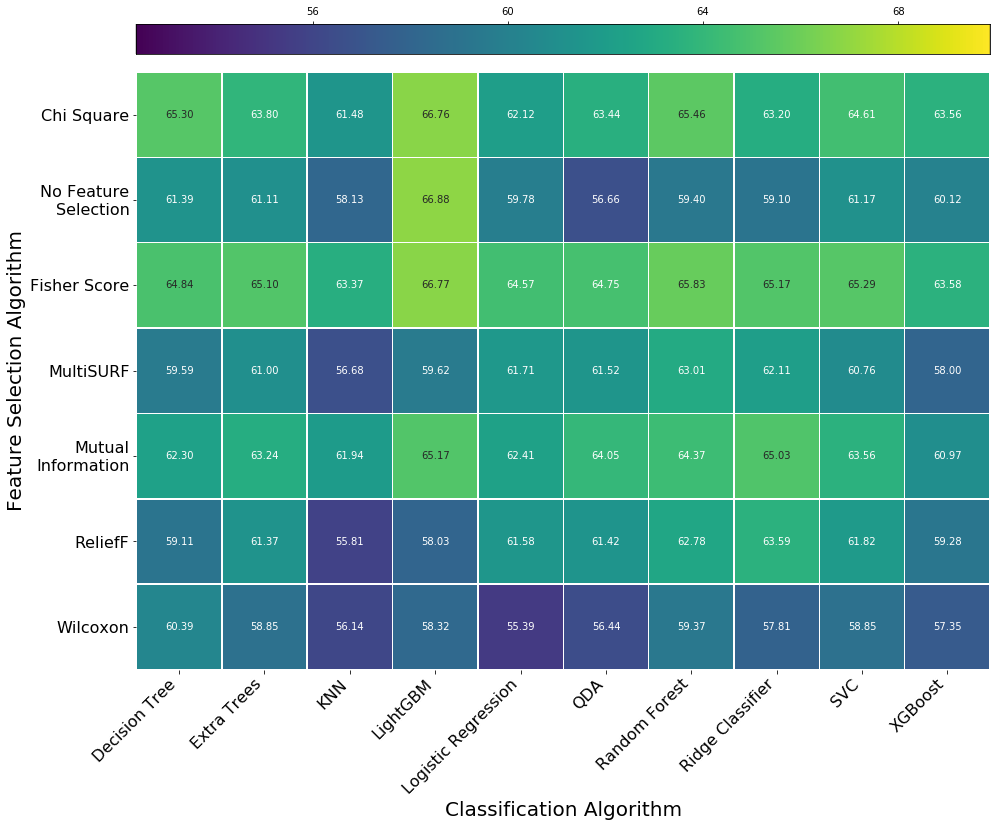

In [11]:
gen_heatmap(
    results_icc,
    path_to_fig='./../../figures/model_comparison_results/hmap_icc_original_images.png'
)

# Dropped ICC and SCC

In [12]:
# NIR: 0.67676767
results_icc_scc = pd.read_csv(
    './../../data_source/results/dropped_corr/results_all_features_original_images_icc_dropped_correlated.csv',
    index_col=0
)

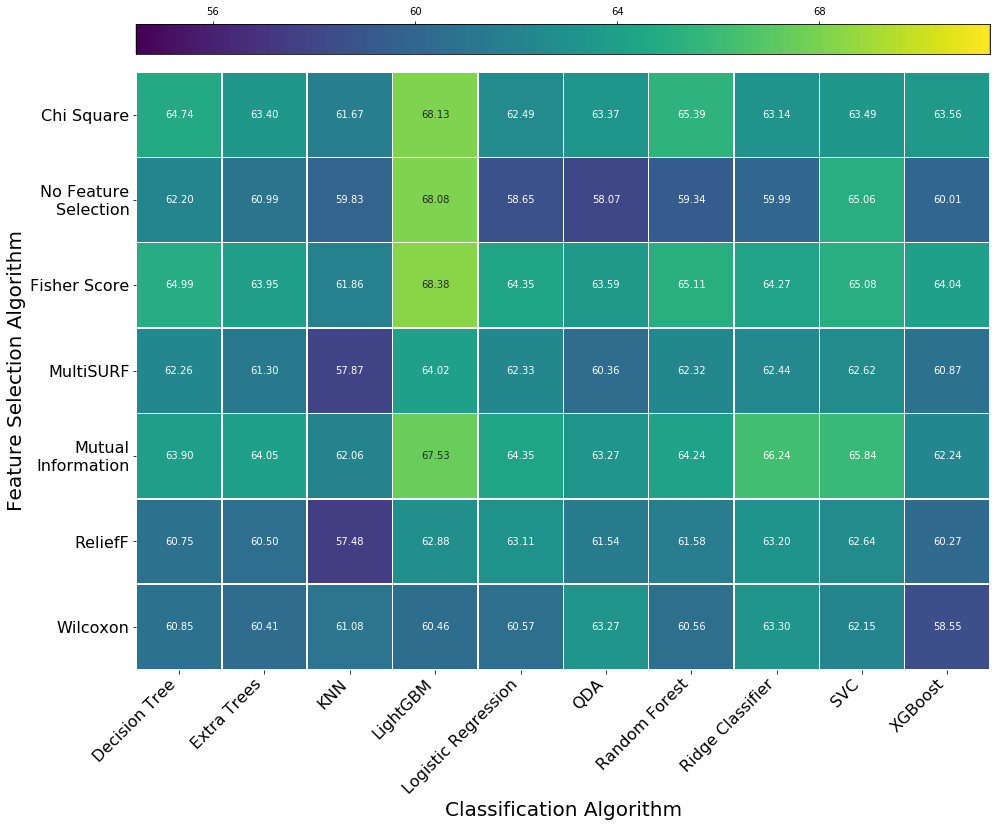

In [13]:
gen_heatmap(
    results_icc_scc,
    path_to_fig='./../../figures/model_comparison_results/hmap_icc_dropped_original_images.png'
)

# HPV splitting Group A Dropped ICC and SCC

In [14]:
# NIR: 0.7317073170731
results_hpv_a_dropped = pd.read_csv(
    './../../data_source/results/hpv_splitting/results_all_features_hpv_group_a.csv',
    index_col=0
)

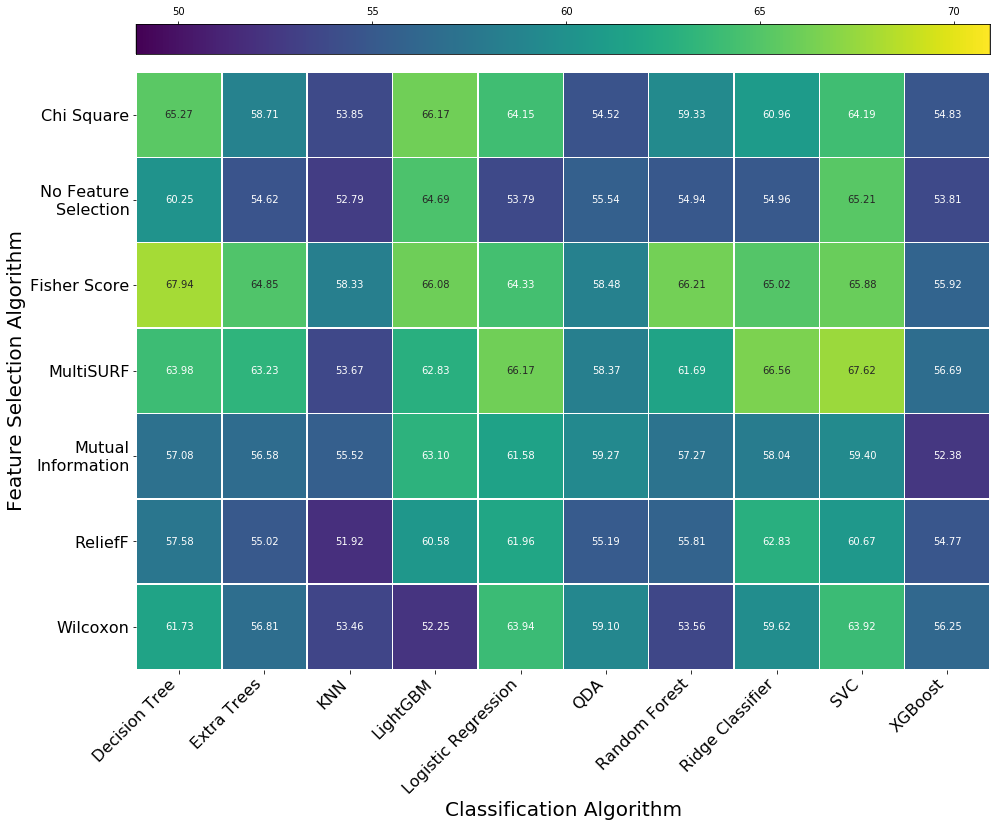

In [15]:
gen_heatmap(
    results_hpv_a_dropped,
    path_to_fig='./../../figures/model_comparison_results/hmap_hpv_a_dropped.png'
)

# HPV splitting Group A

In [31]:
# NIR: 0.731707317073
results_hpv_a = pd.read_csv(
    './../../data_source/results/hpv_splitting/results_all_features_original_images_hpv_group_a.csv',
    index_col=0
)

/anaconda3/envs/biorad/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


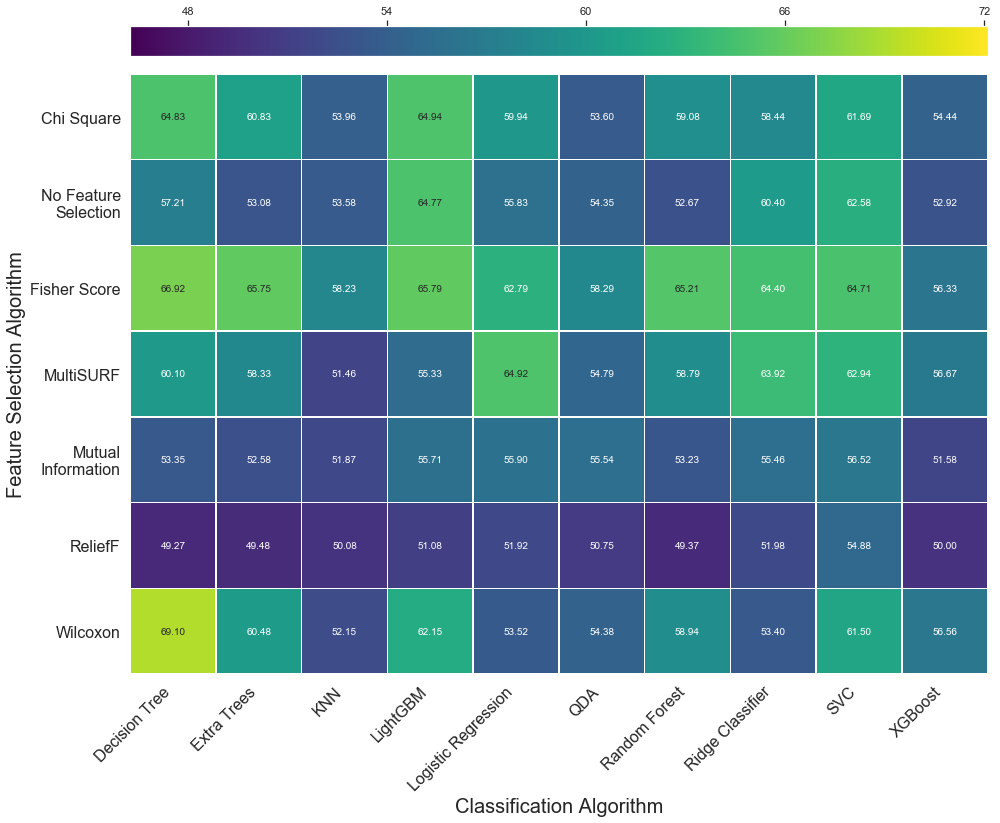

In [32]:
gen_heatmap(
    results_hpv_a,
    path_to_fig='./../../figures/model_comparison_results/hmap_hpv_a.png'
)

# HPV splitting Group B Dropped ICC and SCC

In [18]:
# 0.5373134328
results_hpv_b_dropped = pd.read_csv(
    './../../data_source/results/hpv_splitting/results_all_features_hpv_group_b.csv',
    index_col=0
)

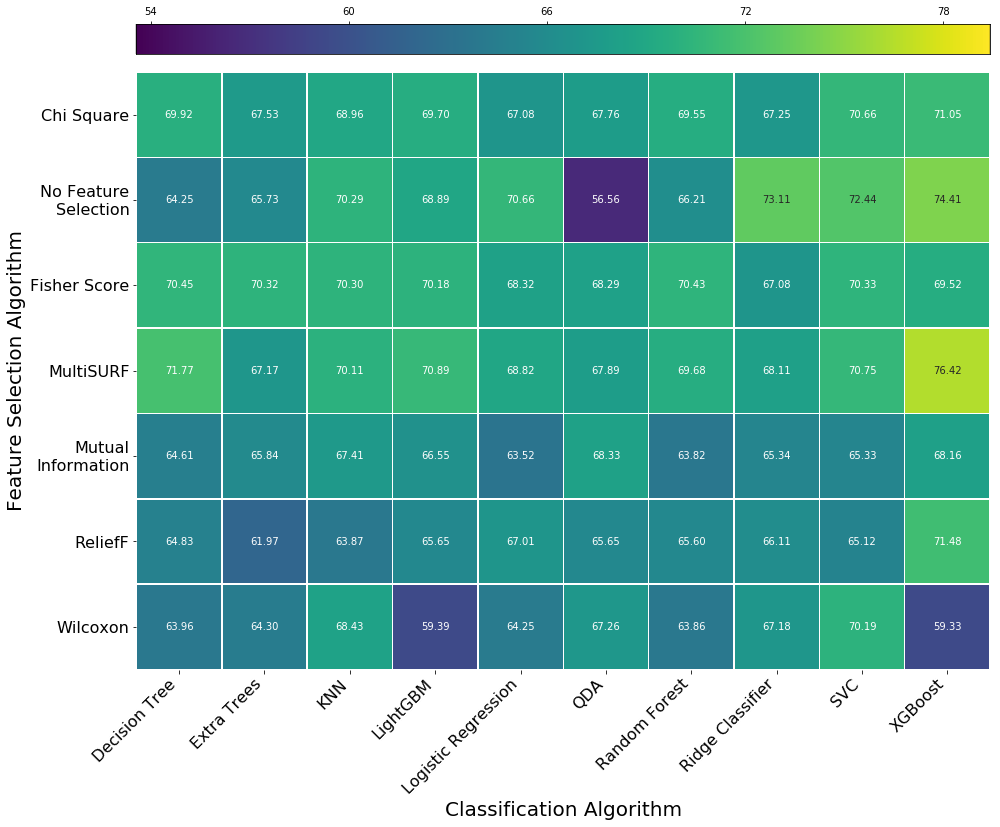

In [19]:
gen_heatmap(
    results_hpv_b_dropped,
    path_to_fig='./../../figures/model_comparison_results/hmap_hpv_b_dropped.png'
)

# HPV splitting Group B

In [216]:
# NIR: 0.5373134328
results_hpv_b = pd.read_csv(
    './../../data_source/results/hpv_splitting/results_all_features_original_images_hpv_group_b.csv',
    index_col=0
)

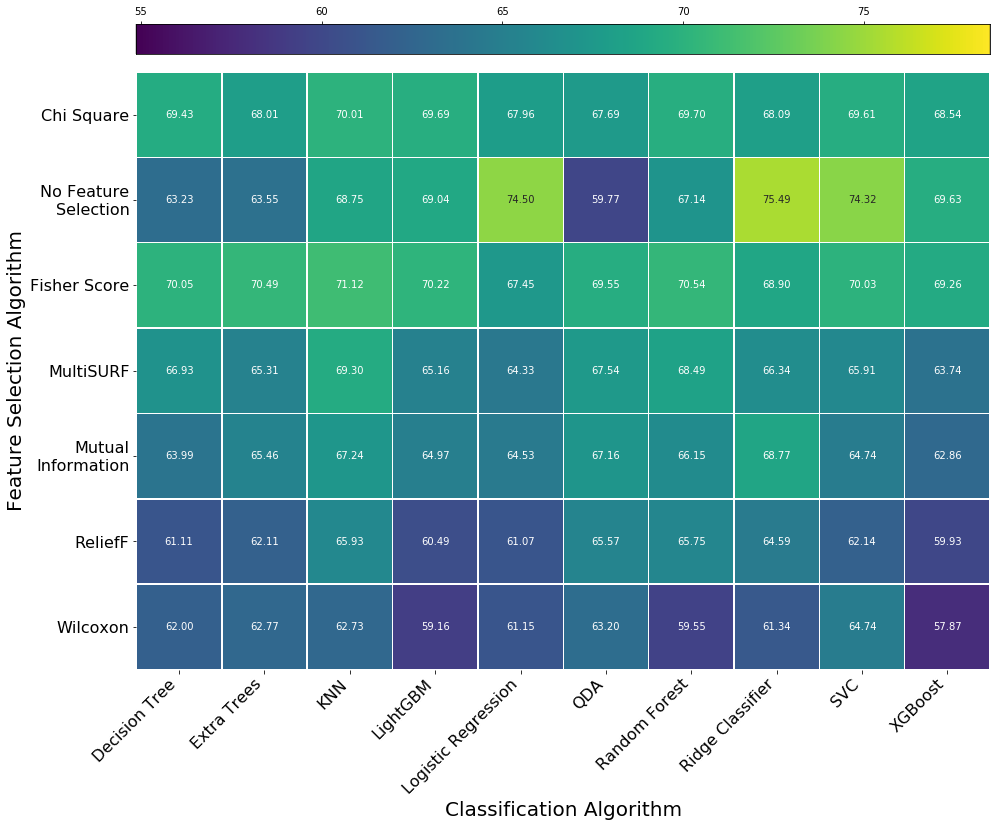

In [21]:
gen_heatmap(
    results_hpv_b,
    path_to_fig='./../../figures/model_comparison_results/hmap_hpv_b.png'
)

# Summary of Results

In [6]:
path_to_results = [
    './../../data_source/results/original_images/results_all_features_original_images.csv',
    './../../data_source/results/removed_broken_slices/results_all_features_removed_broken_slices.csv',
    
    './../../data_source/results/hassan_original_images/results_all_features_icc.csv',
    './../../data_source/results/dropped_corr/results_all_features_original_images_icc_dropped_correlated.csv',

    './../../data_source/results/hpv_splitting/results_all_features_hpv_group_a.csv',
    './../../data_source/results/hpv_splitting/results_all_features_original_images_hpv_group_a.csv',
    
    './../../data_source/results/hpv_splitting/results_all_features_hpv_group_b.csv',
    './../../data_source/results/hpv_splitting/results_all_features_original_images_hpv_group_b.csv'
]
nirs = [0.67, 0.68, 0.67, 0.67, 0.73, 0.73, 0.53, 0.53]

In [7]:
def gen_plot(path_to_result, axis):
    
    results = pd.read_csv(path_to_result, index_col=0)
    results_mat, selector_lbls, estimator_lbls = gen_heatmap_mat(results)
    n_largest = np.sort(results_mat.ravel())[::-1][:n]

    x_coords, y_coords = [], []
    for elem in n_largest:
        x_coord, y_coord = np.where(np.equal(results_mat, elem))
        x_coords.extend(x_coord), y_coords.extend(y_coord)

    x_coords, y_coords = np.array(x_coords), np.array(y_coords)
    
    selector_lbls = selector_lbls[y_coords]
    estimator_lbls = estimator_lbls[x_coords]
    results_mat = np.diag(results_mat[x_coords, y_coords])
    results_mat[results_mat == 0] = np.nan

    hmap = sns.heatmap(
        results_mat.T * 100,
        yticklabels=format_selector_labels(selector_lbls),
        xticklabels=format_estimator_labels(estimator_lbls),
        vmin=np.nanmin(results_mat) * 100 - 1, 
        vmax=np.nanmax(results_mat) * 100 + 1,
        cmap=plt.cm.viridis, 
        robust=True,
        annot=True, 
        fmt='.2f', 
        square=2, 
        linewidth=.5,
        cbar=False,
        ax=axis,
        annot_kws={'size': 14}
    )
    hmap.set_yticklabels(hmap.get_yticklabels(), rotation=0, fontsize=16)
    hmap.set_xticklabels(
        hmap.get_xticklabels(), rotation=30, fontsize=16, 
        va='top', ha='right'
    )

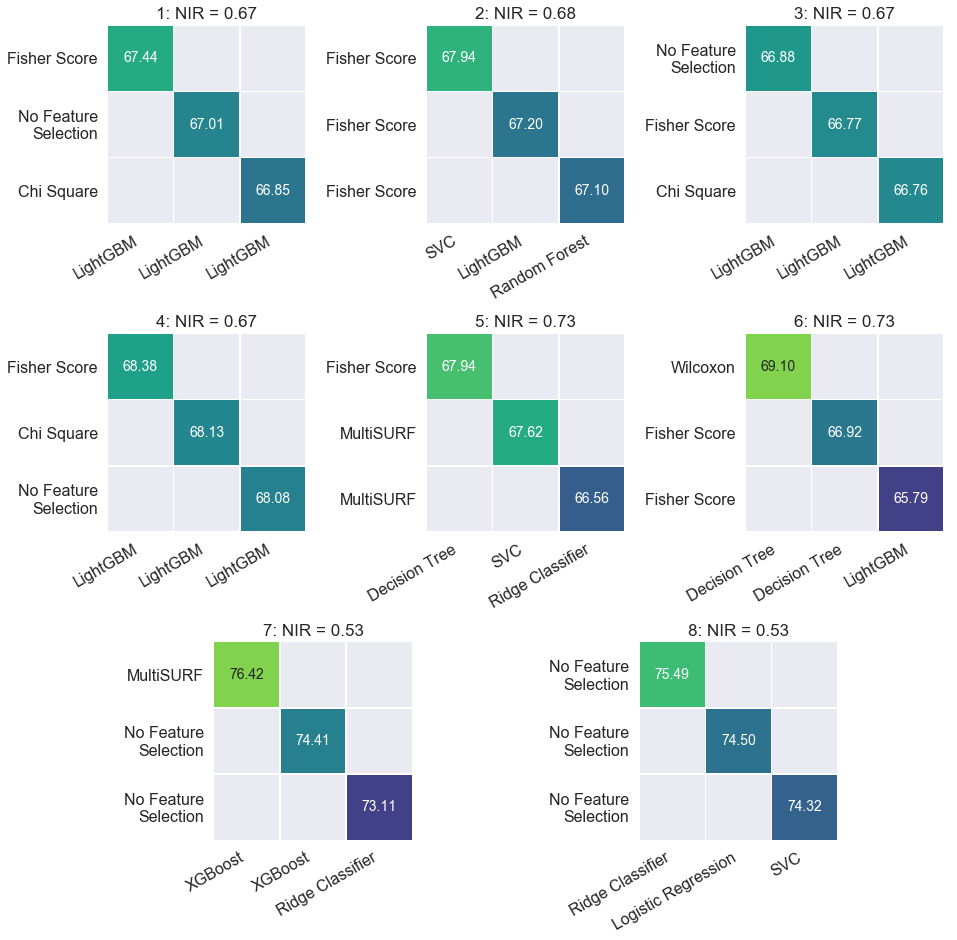

In [14]:
# Top three models from each experiment.

n = 3
titles = [
    #'Baseline', 'Reduced', 'ICC', 'ICC and SCC', 'HPV A, ICC and SCC', 'HPV A', 'HPV B, ICC and SCC', 'HPV B',
    f'{num}: NIR = {nirs[num - 1]}' for num in range(1, 9, 1)
]
col_num = 0
gs = gridspec.GridSpec(3, 8)
fig = plt.figure(figsize=(15, 15))

num = 0
col_num = 0
for row_num in range(3):
    if row_num == 2:
        for col_num in [1, 5]:
            axis = plt.subplot(gs[row_num, col_num:col_num + 2])
            axis.set_title(titles[num], fontsize=17)
            #axis.text(2, 2, 'nir', fontsize=16)
            gen_plot(path_to_results[num], axis)
            num = num + 1
    else:
        for col_num in [0, 3, 6]:
            axis = plt.subplot(gs[row_num, col_num:col_num + 2])
            #axis.text(2, 1, 'nir', fontsize=16)
            gen_plot(path_to_results[num], axis)
            axis.set_title(titles[num], fontsize=17)
            num = num + 1
    
    #ax_divider = make_axes_locatable(hmap)
    # Define size and padding of axes for colorbar.
    #cax = ax_divider.append_axes('top', size='5%', pad='3%')
    #colorbar(hmap.get_children()[0], cax=cax, orientation='horizontal')
    #cax.xaxis.set_ticks_position('top')

plt.subplots_adjust(wspace=0.15, hspace=0.55)    
plt.savefig(
    './../../figures/model_comparison_results/summary_hmaps.png',
    bbox_inches='tight',
    dpi=100, 
)